In [1]:
import streamlit as st


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("survey_results_public.csv")

In [4]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [5]:
df=df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]

In [6]:
df=df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [7]:
df=df[df["Salary"].notnull()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [9]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [10]:
df=df.dropna()

2022-07-17 13:46:48.285 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [11]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [12]:
df=df[df["Employment"]=="Employed full-time"]

In [13]:
df["Country"].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Mauritania                                                 1
Libyan Arab Jamahiriya                                     1
Saint Vincent and the Grenadines                           1
Dominica                                                   1
Gambia                                                     1
Name: Country, Length: 166, dtype: int64

In [14]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]="Other"
    return categorical_map

In [15]:
country_map=shorten_categories(df.Country.value_counts(),400)
df["Country"]=df["Country"].map(country_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

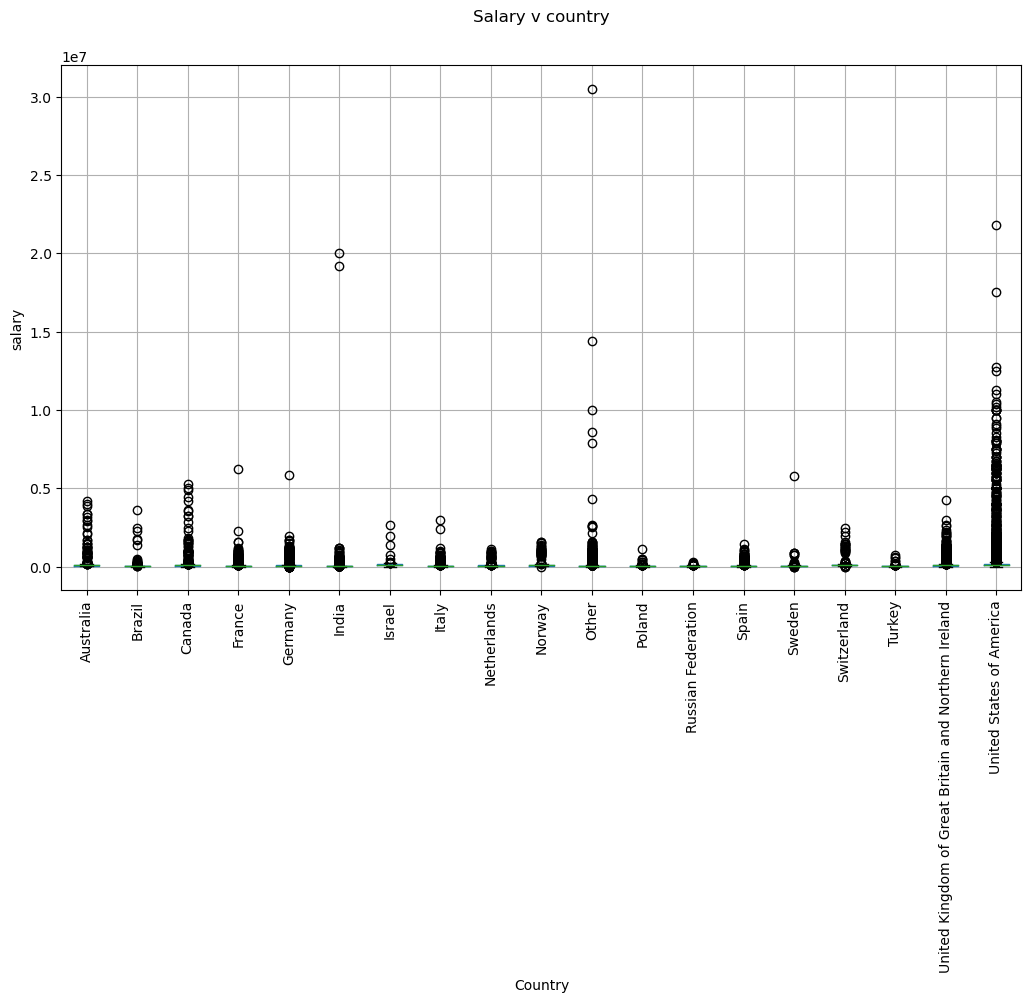

In [16]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary v country")
plt.title(" ")
plt.ylabel("salary")
plt.xticks(rotation=90)
plt.show()

In [17]:
df=df[df["Salary"]<=40000]
df=df[df["Salary"]>8000]
df = df[df['Country'] != 'Other']


In [18]:
df.Country.unique()

array(['Turkey', 'France', 'Russian Federation', 'Netherlands', 'Poland',
       'Spain', 'Italy',
       'United Kingdom of Great Britain and Northern Ireland', 'Germany',
       'India', 'Brazil', 'United States of America', 'Canada',
       'Switzerland', 'Sweden', 'Israel', 'Australia', 'Norway'],
      dtype=object)

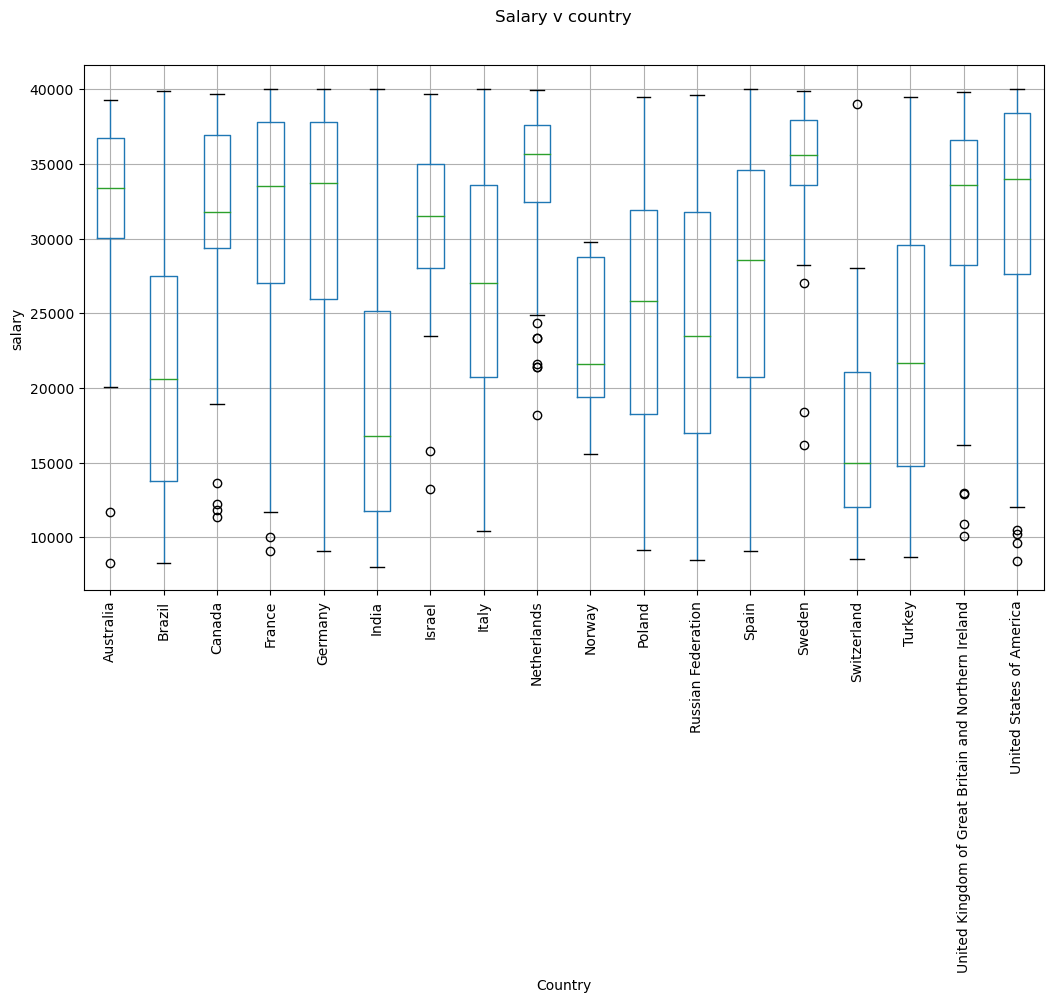

In [19]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary v country")
plt.title(" ")
plt.ylabel("salary")
plt.xticks(rotation=90)
plt.show()

In [20]:
df["YearsCodePro"].unique()

array(['2', '16', '3', '4', '8', '5', '7', '12', '11', '10', '1', '20',
       'Less than 1 year', '6', '15', '13', '30', '19', '14', '9', '22',
       '17', '21', '25', '31', '26', '18', '38', '28', '23', '35', '24',
       '27', '42', '33', '39', '29', '32', '37', '34'], dtype=object)

In [21]:
def clean_experience(x):
    if x=="Less than 1 year":
        return 0.5
    return float(x)


In [22]:
df["YearsCodePro"]=df["YearsCodePro"].apply(clean_experience)

In [23]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [24]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [25]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 3, 1])

In [27]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([15,  3, 11,  8, 10, 12,  7, 16,  4,  5,  1, 17,  2, 14, 13,  6,  0,
        9])

In [28]:
X = df.drop(["Salary","Employment"], axis=1)
y = df["Salary"]

In [29]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [30]:
y_pred=linear_reg.predict(X)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [32]:
error

9096.43461409349

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [34]:
y_pred = dec_tree_reg.predict(X)

In [35]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$6,865.29


In [36]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = random_forest_reg.predict(X)

In [38]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$6,903.65


In [39]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [40]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$7,493.20


In [41]:
X

,Country,EdLevel,YearsCodePro
16,15,0,2.0
23,3,2,2.0
29,11,2,16.0
33,15,0,2.0
41,3,2,3.0
...,...,...,...
83394,5,0,4.0
83399,5,0,6.0
83416,17,0,10.0
83420,3,2,4.0


In [42]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [43]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[17.,  2., 15.]])

In [44]:
y_pred = regressor.predict(X)
y_pred

array([30831.72580645])

In [45]:
import pickle

In [46]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [47]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [48]:
le_country

LabelEncoder()

In [49]:
regressor_loaded

DecisionTreeRegressor(max_depth=6, random_state=0)

In [50]:
y_pred = regressor_loaded.predict(X)
y_pred

array([30831.72580645])

In [51]:
Country

NameError: name 'Country' is not defined